# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;">Import Libraries</div></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import pickle as pkl
import warnings
import re
warnings.filterwarnings("ignore")


**Reading Data**

In [2]:
df = pd.read_csv(r"/Users/nisargavenkatesh/Desktop/Asarco/Telconnect data.csv")


# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;">Exploratory Data Analysis (EDA)</div></center>

**SHhowing Data**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check the Shape of Data**

In [4]:
df.shape

(7043, 21)

**Print the information of the Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Has_Partner       7043 non-null   object 
 4   Has_Dependents    7043 non-null   object 
 5   account_tenure    7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Churn Distribution & Customer Behavior Analysis

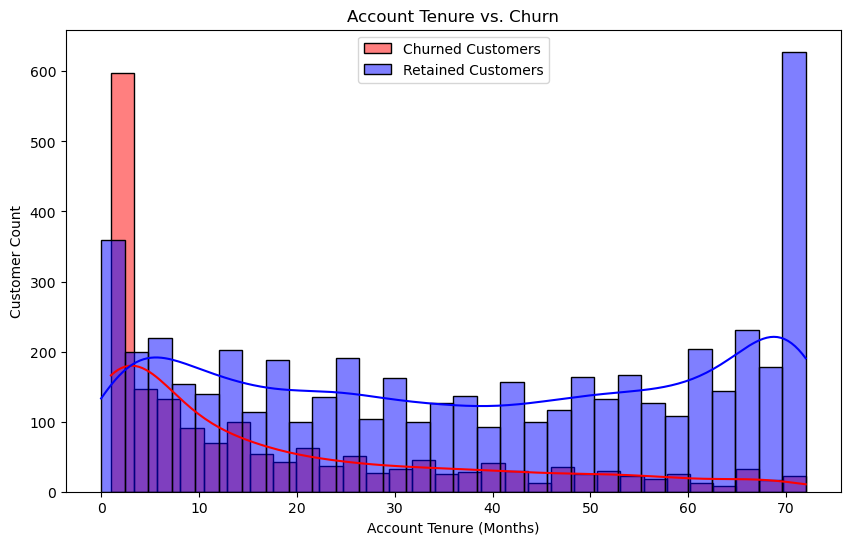

In [6]:
# Checking churn rates by account tenure
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == "Yes"]['account_tenure'], bins=30, kde=True, color='red', label='Churned Customers')
sns.histplot(df[df['Churn'] == "No"]['account_tenure'], bins=30, kde=True, color='blue', label='Retained Customers')
plt.xlabel("Account Tenure (Months)")
plt.ylabel("Customer Count")
plt.title("Account Tenure vs. Churn")
plt.legend()
plt.show()


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
account_tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


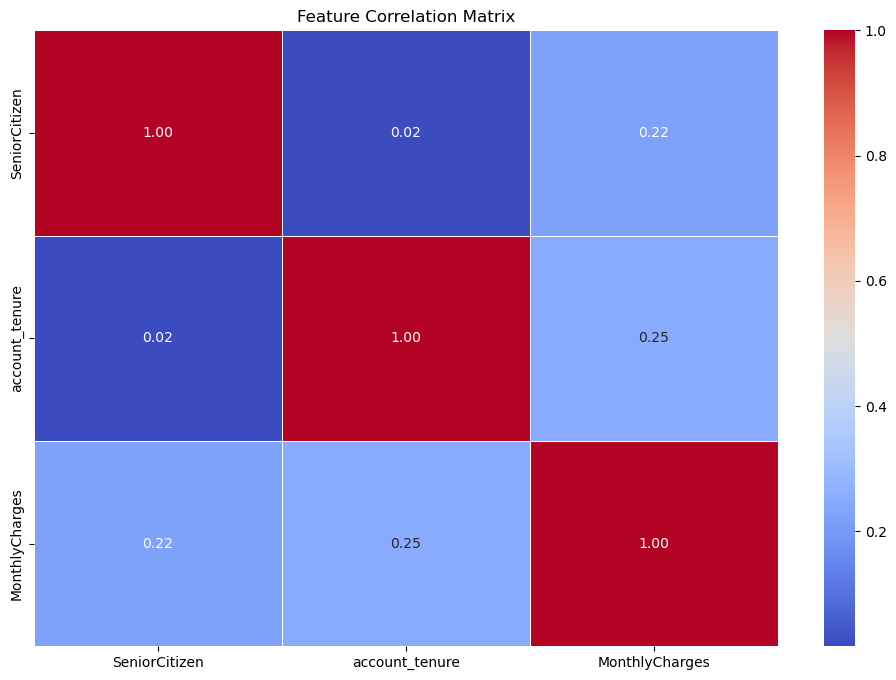

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


**Drop the unuseful column**

In [9]:
df.drop('customerID', axis=1, inplace=True )

cols=df.columns
cols

Index(['gender', 'SeniorCitizen', 'Has_Partner', 'Has_Dependents',
       'account_tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Function for Details for all Columns**

In [10]:
info_columns={'Name':[], 'Data_Type':[], 'Null_Values':[], 'Num_of_unique':[], 'Unique_Values':[]}
def info_col(col):
    info_columns['Name'].append(col.name)
    info_columns['Data_Type'].append(col.dtype)
    info_columns['Null_Values'].append(col.isnull().sum())
    info_columns['Num_of_unique'].append(col.nunique())
    if col.nunique() < 10:
        info_columns['Unique_Values'].append(col.unique())
    else:
        info_columns['Unique_Values'].append('More than 10')
    

**Print the Result of the Function**

In [11]:
for col in cols:
    info_col(df[col])
      
info_columns=pd.DataFrame(info_columns)
info_columns

,Name,Data_Type,Null_Values,Num_of_unique,Unique_Values
0,gender,object,0,2,"[Female, Male]"
1,SeniorCitizen,int64,0,2,"[0, 1]"
2,Has_Partner,object,0,2,"[Yes, No]"
3,Has_Dependents,object,0,2,"[No, Yes]"
4,account_tenure,int64,0,73,More than 10
5,PhoneService,object,0,2,"[No, Yes]"
6,MultipleLines,object,0,3,"[No phone service, No, Yes]"
7,InternetService,object,0,3,"[DSL, Fiber optic, No]"
8,OnlineSecurity,object,0,3,"[No, Yes, No internet service]"
9,OnlineBackup,object,0,3,"[Yes, No, No internet service]"


In [12]:
df.isna().sum()

gender              0
SeniorCitizen       0
Has_Partner         0
Has_Dependents      0
account_tenure      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# check for null?
df.TotalCharges.value_counts().sort_index()

          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: TotalCharges, Length: 6531, dtype: int64

**Find the Relation between tenure and Monthlycharges**

In [14]:
df['account_tenure x MonthlyCharges']=df['account_tenure'] * df['MonthlyCharges']

df[['account_tenure','MonthlyCharges','TotalCharges','account_tenure x MonthlyCharges']]

,account_tenure,MonthlyCharges,TotalCharges,account_tenure x MonthlyCharges
0,1,29.85,29.85,29.85
1,34,56.95,1889.5,1936.30
2,2,53.85,108.15,107.70
3,45,42.30,1840.75,1903.50
4,2,70.70,151.65,141.40
...,...,...,...,...
7038,24,84.80,1990.5,2035.20
7039,72,103.20,7362.9,7430.40
7040,11,29.60,346.45,325.60
7041,4,74.40,306.6,297.60


***Convert the 'totalCharges' column to numeric and replace the object values with NaN***

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce',)

**Replace the NaN values in TotalCharges with its MonthlyCharges**

In [16]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [17]:
df.TotalCharges.value_counts().sort_index()

18.80      1
18.85      2
18.90      1
19.00      1
19.05      1
          ..
8564.75    1
8594.40    1
8670.10    1
8672.45    1
8684.80    1
Name: TotalCharges, Length: 6534, dtype: int64

# Check Null of the Data

In [18]:
df.isna().sum()

gender                             0
SeniorCitizen                      0
Has_Partner                        0
Has_Dependents                     0
account_tenure                     0
PhoneService                       0
MultipleLines                      0
InternetService                    0
OnlineSecurity                     0
OnlineBackup                       0
DeviceProtection                   0
TechSupport                        0
StreamingTV                        0
StreamingMovies                    0
Contract                           0
PaperlessBilling                   0
PaymentMethod                      0
MonthlyCharges                     0
TotalCharges                       0
Churn                              0
account_tenure x MonthlyCharges    0
dtype: int64

# Check the Duplicate Data

In [19]:
df.duplicated().sum()

22

# Hundling the Duplicate Data

In [20]:
df.drop_duplicates(inplace=True)

# Correlation matrix to understand feature relationships

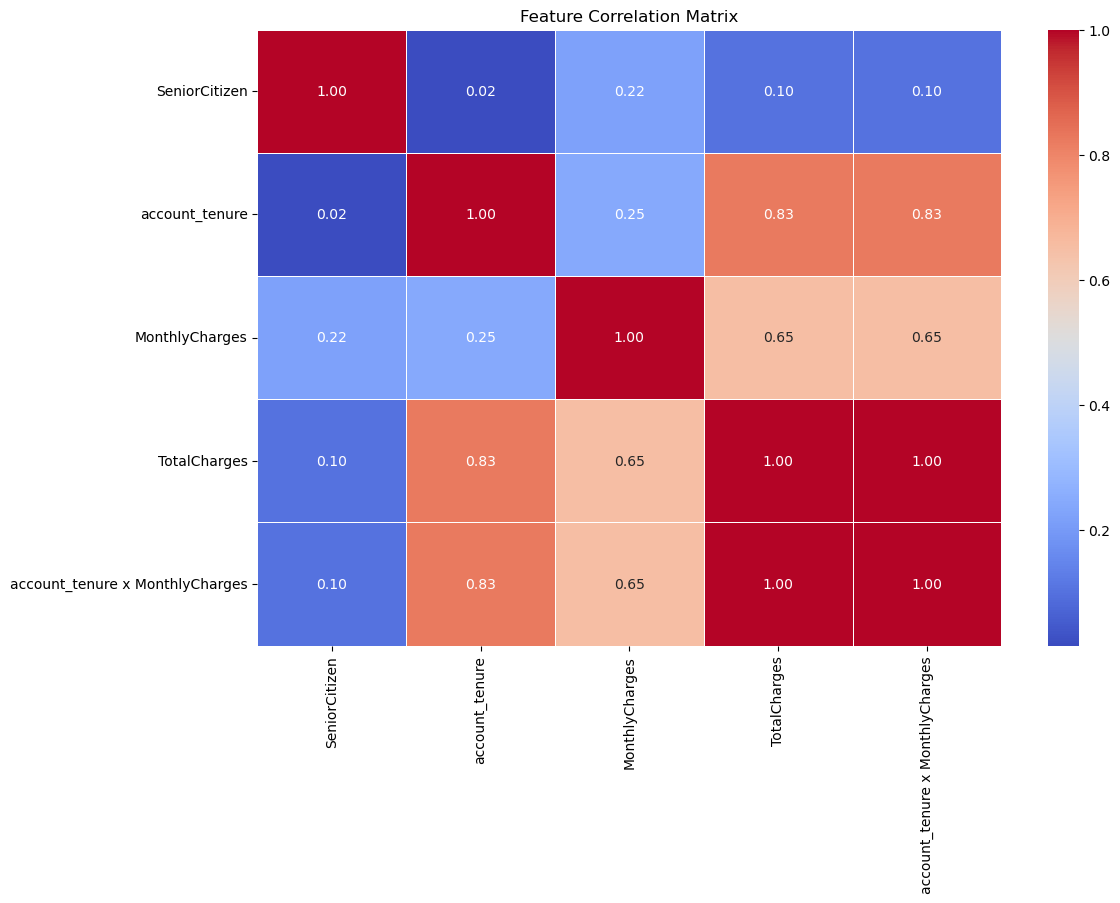

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;"> Data Visualization</div></center>

>1.Which of the customers are more likely to churn(Male,Female) ?

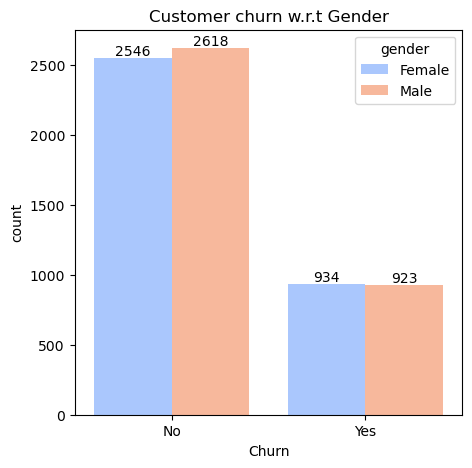

In [22]:

plt.figure(figsize=(5,5))
sns.countplot(x='Churn',data=df,hue='gender',palette='coolwarm',saturation=200)

for p in plt.gca().patches:  
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),ha='center',va='bottom')

plt.title('Customer churn w.r.t Gender')
plt.show()

Conclusion --> This shows that both the male and female customers equally stops using the service with a negligible difference between the numbers.

>2.What is the percentage of Churn Customers and active customers ?

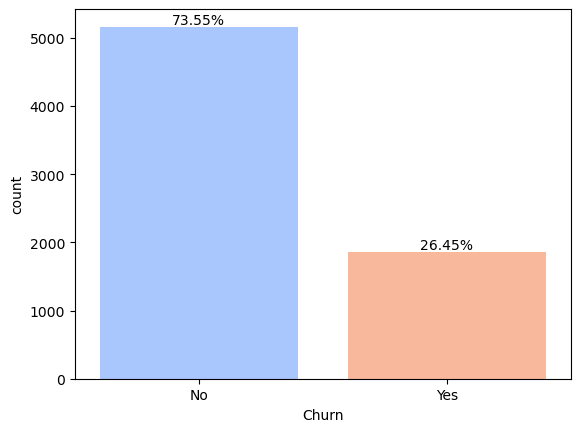

In [23]:
sns.countplot(x='Churn',data=df,palette='coolwarm',saturation=100)


for p in plt.gca().patches:
    height=p.get_height()
    total=len(df)
    percentage=(height*100)/total
    plt.text(p.get_x() + p.get_width() / 2,height,f'{percentage:.2f}%',
             ha='center',va='bottom',label=True)
   
plt.show()

Conclusion :

26.45% are Churned Customers.

73.55% are Active Cutomers.

>3.Most used internet service by the Churned Customers

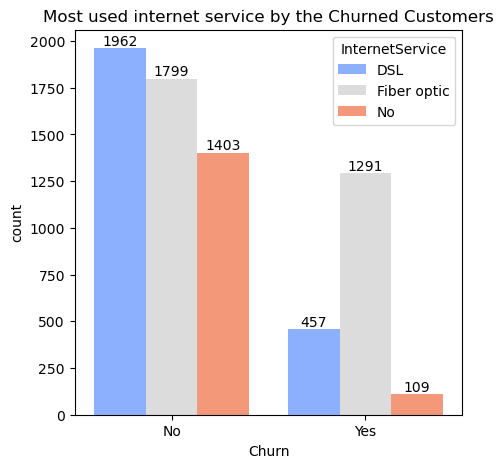

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn',data=df,hue='InternetService',palette='coolwarm',saturation=10)

for p in plt.gca().patches:  
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),ha='center',va='bottom')

plt.title('Most used internet service by the Churned Customers')
plt.show()

CONCLUSION :

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

>4.Which of the customers are more likely to churn Existing or Newly joined ?

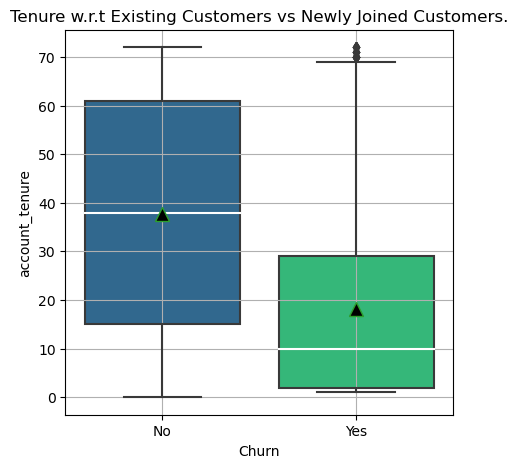

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Churn',y='account_tenure',data=df,palette='viridis',
            showmeans=True,
            medianprops={'color':"white"},
            meanprops={'markerfacecolor':'black','markersize':10},saturation=100)
plt.title('Tenure w.r.t Existing Customers vs Newly Joined Customers.')

plt.grid()
plt.show()

CONCLUSION :

The Lowest mean(small triangle) in churned customers plot tells that the new customers are more likely to unsubscribe the firm/service.

>5.Who have more partners(Male/female) and Is users with partners are more likely to churn or not having any partner ?

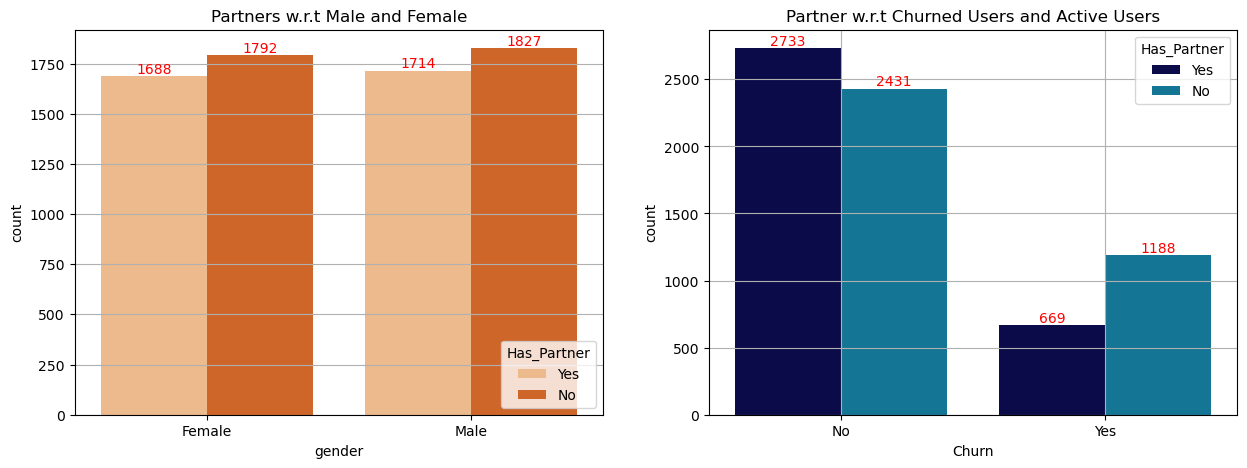

In [26]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1,2,1)

plt.grid()
plt.title('Partners w.r.t Male and Female')
sns.countplot(x='gender',hue='Has_Partner',palette='Oranges',data=df)
for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.legend(title='Has_Partner',loc='lower right')


#plot 2
plt.subplot(1,2,2)
sns.countplot(x='Churn',hue='Has_Partner',data=df,palette='ocean',dodge=True)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.grid()
plt.title('Partner w.r.t Churned Users and Active Users')

plt.show()

CONCLUSION :

The 1st plot suggest that, Male have 1710 partners and Female have 1683 partners.

The 2nd plot suggest that, Users having no partners are more likely to churn.

>6.Most used Payment Method by the churned users ?

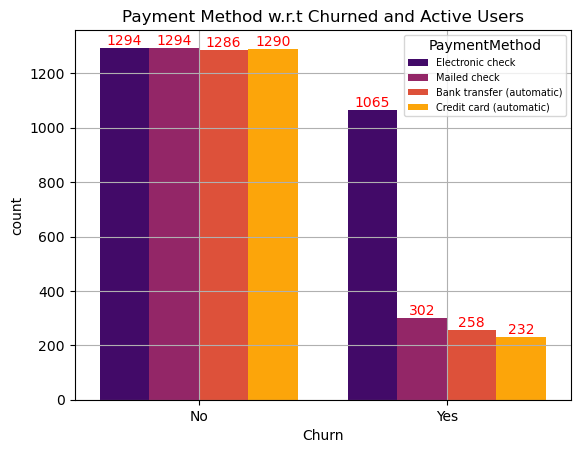

In [27]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df,palette='inferno',saturation=100)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.title('Payment Method w.r.t Churned and Active Users')
plt.legend(title='PaymentMethod',fontsize=7)
plt.grid()
plt.show()

CONCLUSION :

Users performing transactions through "Electronic Check Method" are more likely to churn.

>7.Does Online Security and Online backup is a concern for the churned users ?

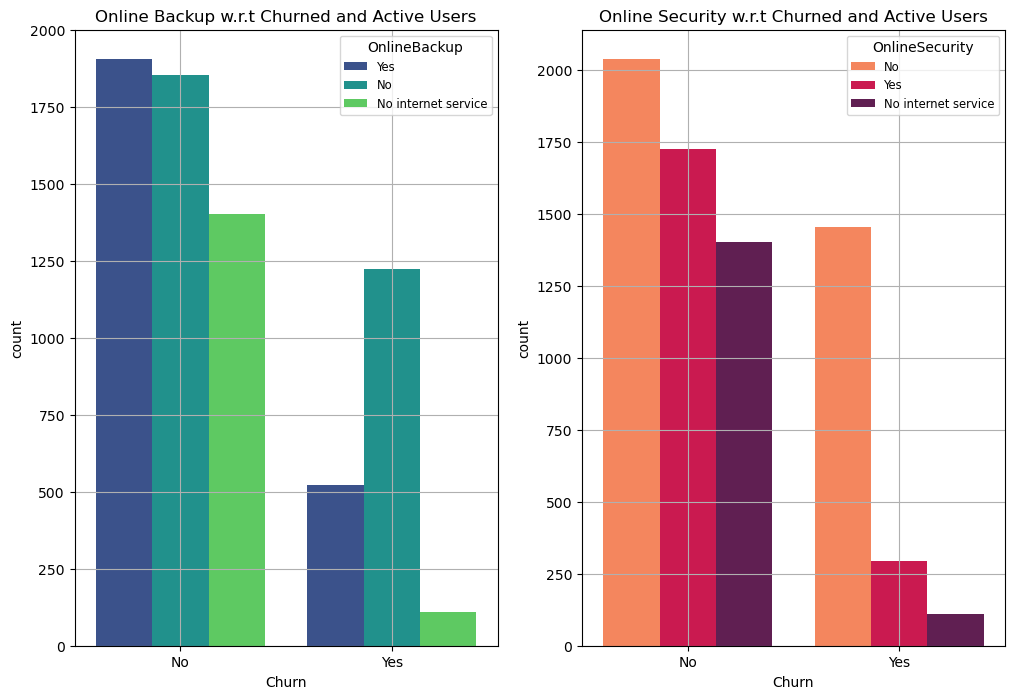

In [28]:
plt.figure(figsize=(12,8))

#plot 1
plt.subplot(1,2,1)
sns.countplot(x='Churn',hue='OnlineBackup',data=df,palette='viridis',dodge=True,saturation=10)
plt.title('Online Backup w.r.t Churned and Active Users')
plt.legend(title='OnlineBackup',loc='upper right',fontsize='small')
plt.grid()

#plot 2
plt.subplot(1,2,2)
sns.countplot(x='Churn',hue='OnlineSecurity',data=df,palette='rocket_r',dodge=True,saturation=10)
plt.title('Online Security w.r.t Churned and Active Users')
plt.legend(title='OnlineSecurity',loc='upper right',fontsize='small')
plt.grid()

plt.show()

CONCLUSION :

Users with less online security are more likely to churn.

Users with less online backup are more likely to churn.

>8.Does tech support feature, a concern for the churned customers ?

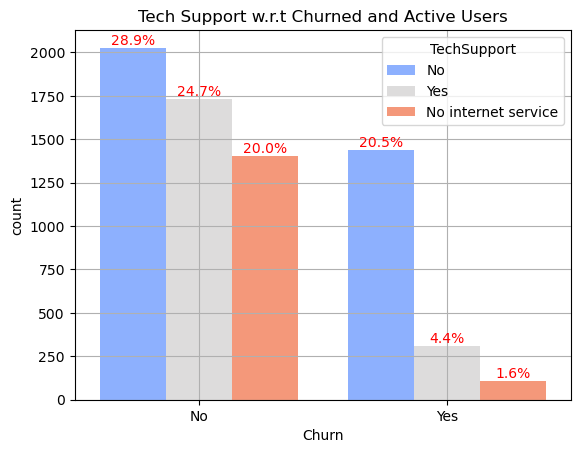

In [29]:
sns.countplot(x='Churn',hue='TechSupport',data=df,palette='coolwarm',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Tech Support w.r.t Churned and Active Users')

plt.grid()
plt.show()

CONCLUSION :

Users with no tech support are more likely to Churn.

>9.Does service contracts reduce active customers ?

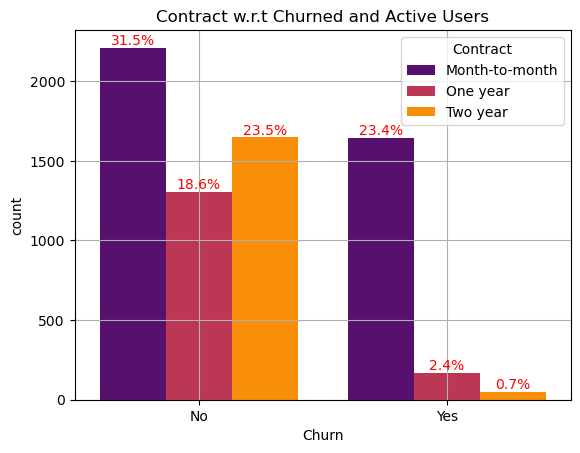

In [30]:
sns.countplot(x='Churn',hue='Contract',data=df,palette='inferno',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Contract w.r.t Churned and Active Users')

plt.grid()
plt.show()

In [31]:
bins = [0, 12, 24, 36, 48, 60, df['account_tenure'].max()]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years','4-5 Years', '>5 Years']
df['tenure_group'] = pd.cut(df['account_tenure'], bins=bins, labels=labels)

CONCLUSION :

Users with month_to_month contracts are more likely to Churn while users with one year and two year contracts are less likely to churn

> Showing the distrbution of Tenure

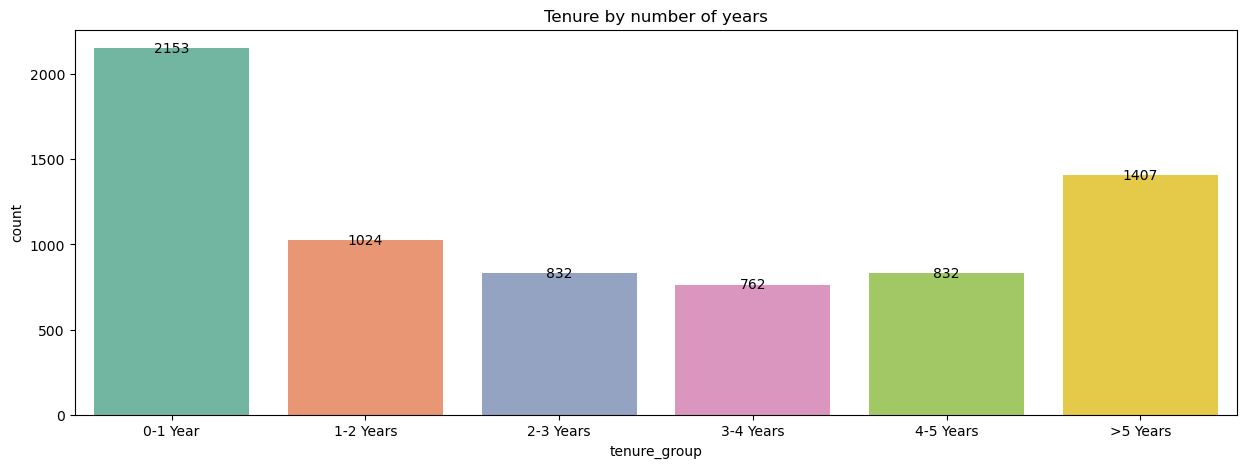

In [32]:

plt.figure(figsize=(15,5))
sns.countplot(x=df.tenure_group,data=df,palette='Set2')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.title('Tenure by number of years')
plt.show()

In [33]:
cols

Index(['gender', 'SeniorCitizen', 'Has_Partner', 'Has_Dependents',
       'account_tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

> Columns include Service

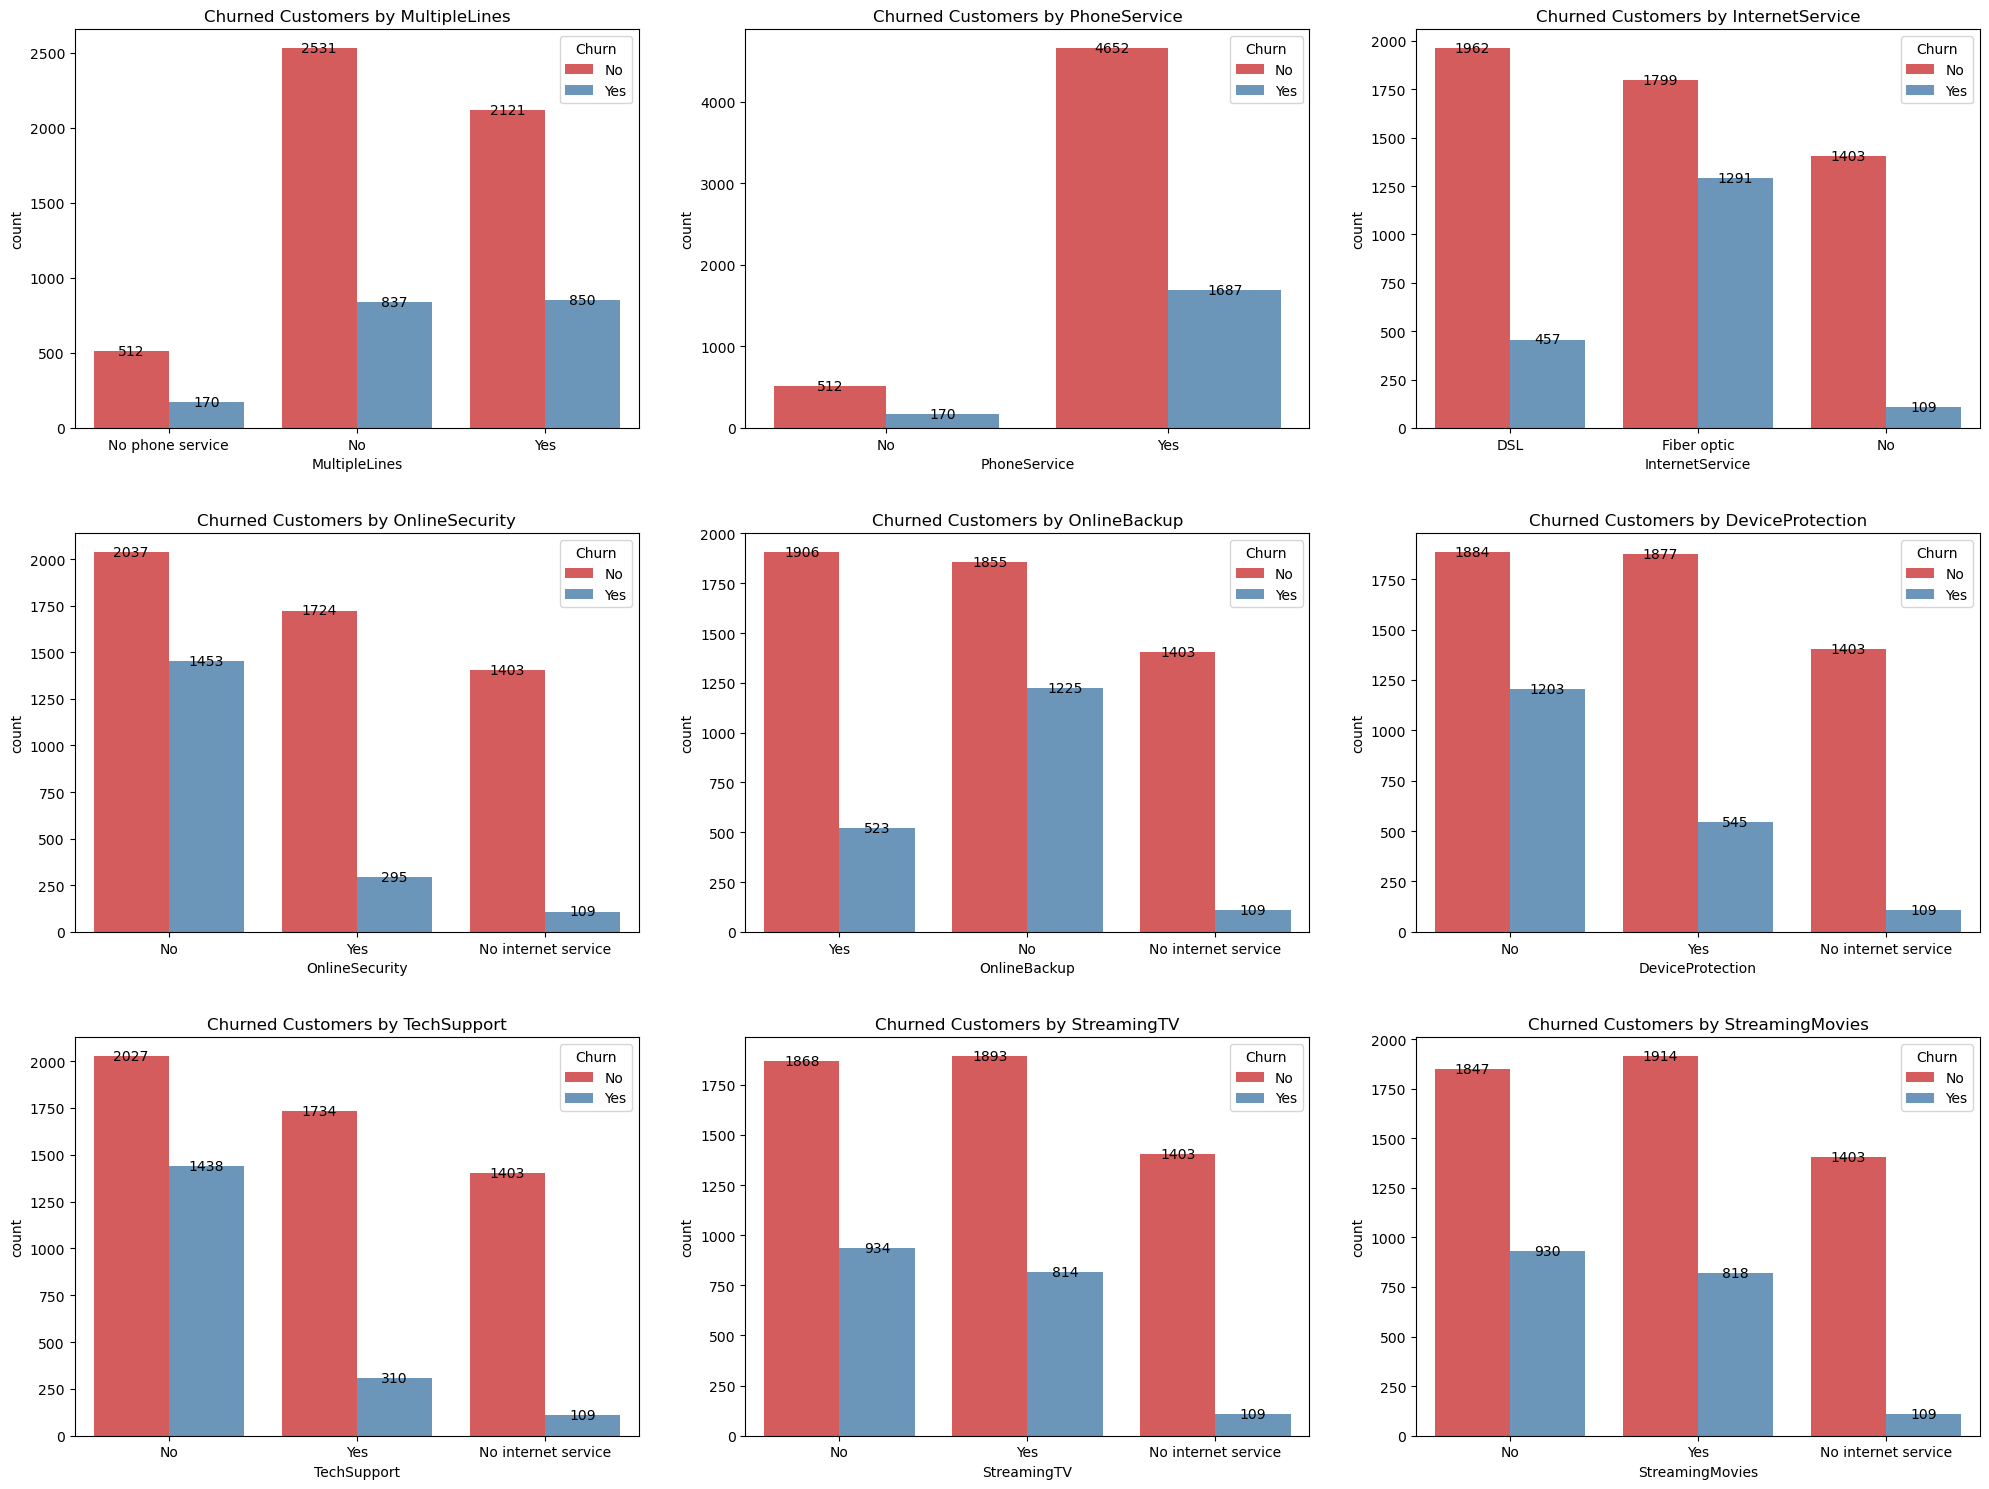

In [34]:
col_service=['MultipleLines', 'PhoneService', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

plt.figure(figsize=(20,15))
for i,col in enumerate(col_service,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')
    
    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3,w_pad=3)

> The Relation between Contract and paymentMethod

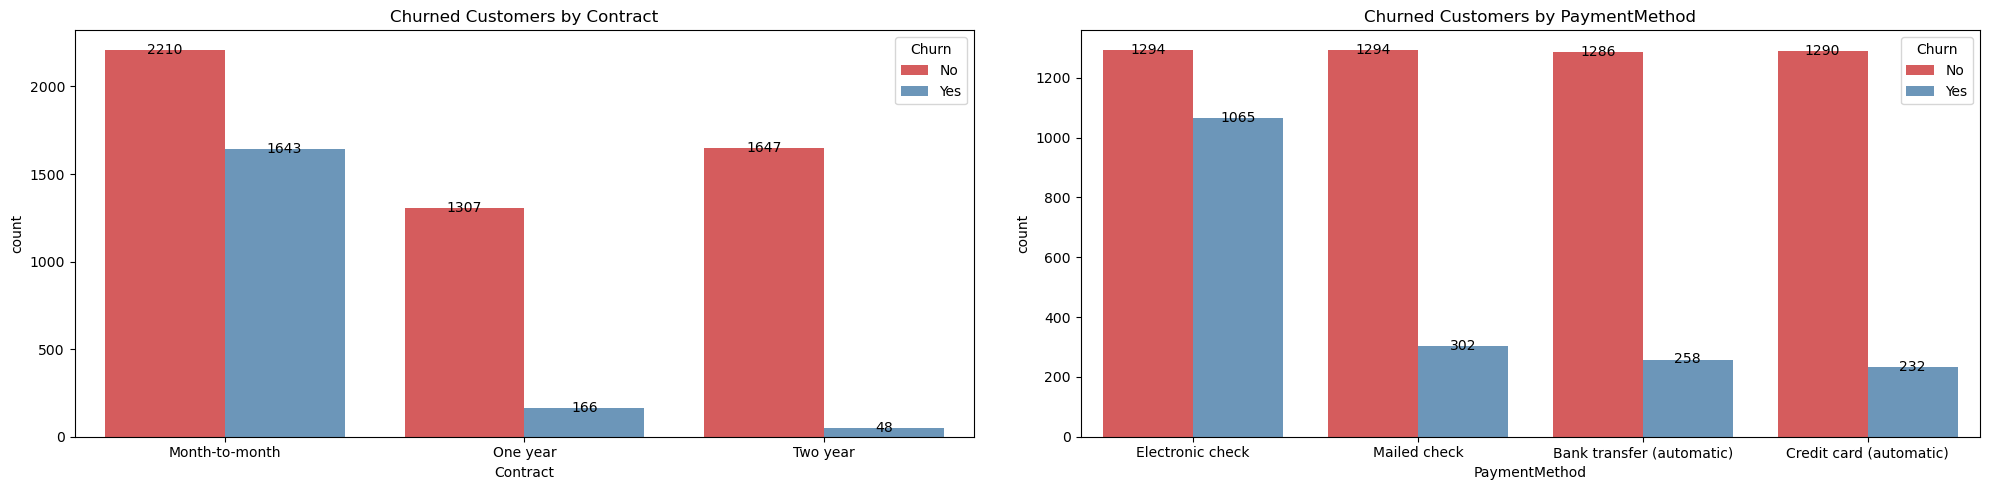

In [35]:
plt.figure(figsize=(20,5))
for i,col in enumerate(['Contract','PaymentMethod'],1):
    plt.subplot(1,2,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')
    
    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=5,w_pad=3)

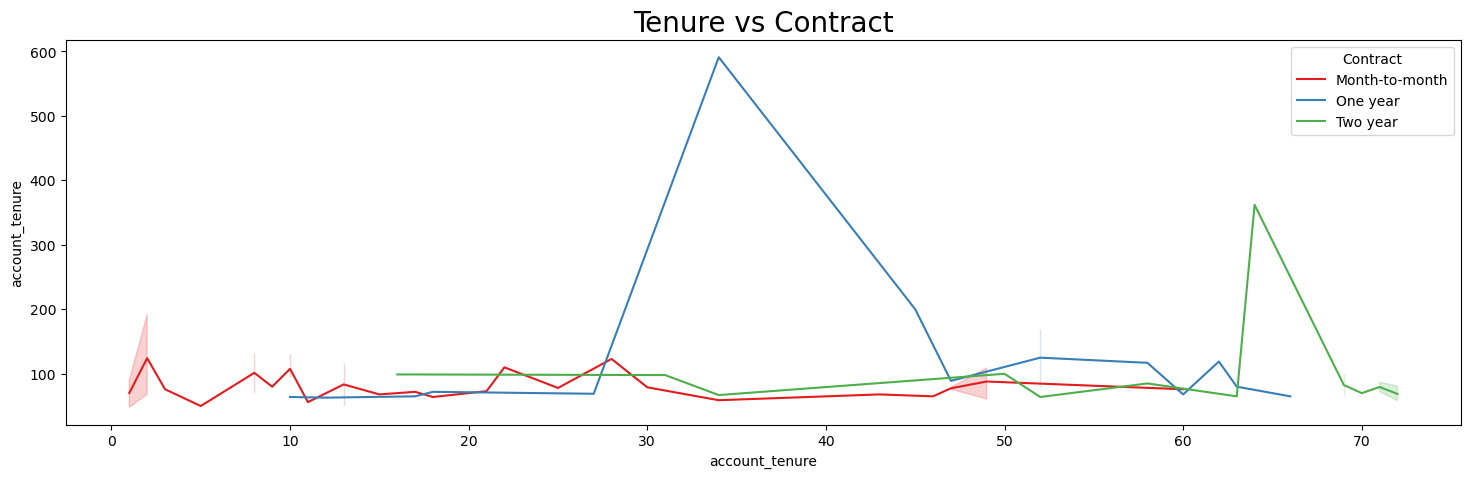

In [36]:
plt .figure(figsize=(18,5))
sns.lineplot(data = df ,x = 'account_tenure',y=df['account_tenure'].value_counts(), hue = 'Contract', palette='Set1')
plt.title('Tenure vs Contract',size=20)
plt.show()

In [37]:
dd=df.groupby(['account_tenure','Contract'])['Contract'].count()
dd

account_tenure  Contract      
0               One year            1
                Two year           10
1               Month-to-month    582
                One year            7
                Two year            2
                                 ... 
71              One year           28
                Two year          137
72              Month-to-month      2
                One year           17
                Two year          343
Name: Contract, Length: 218, dtype: int64

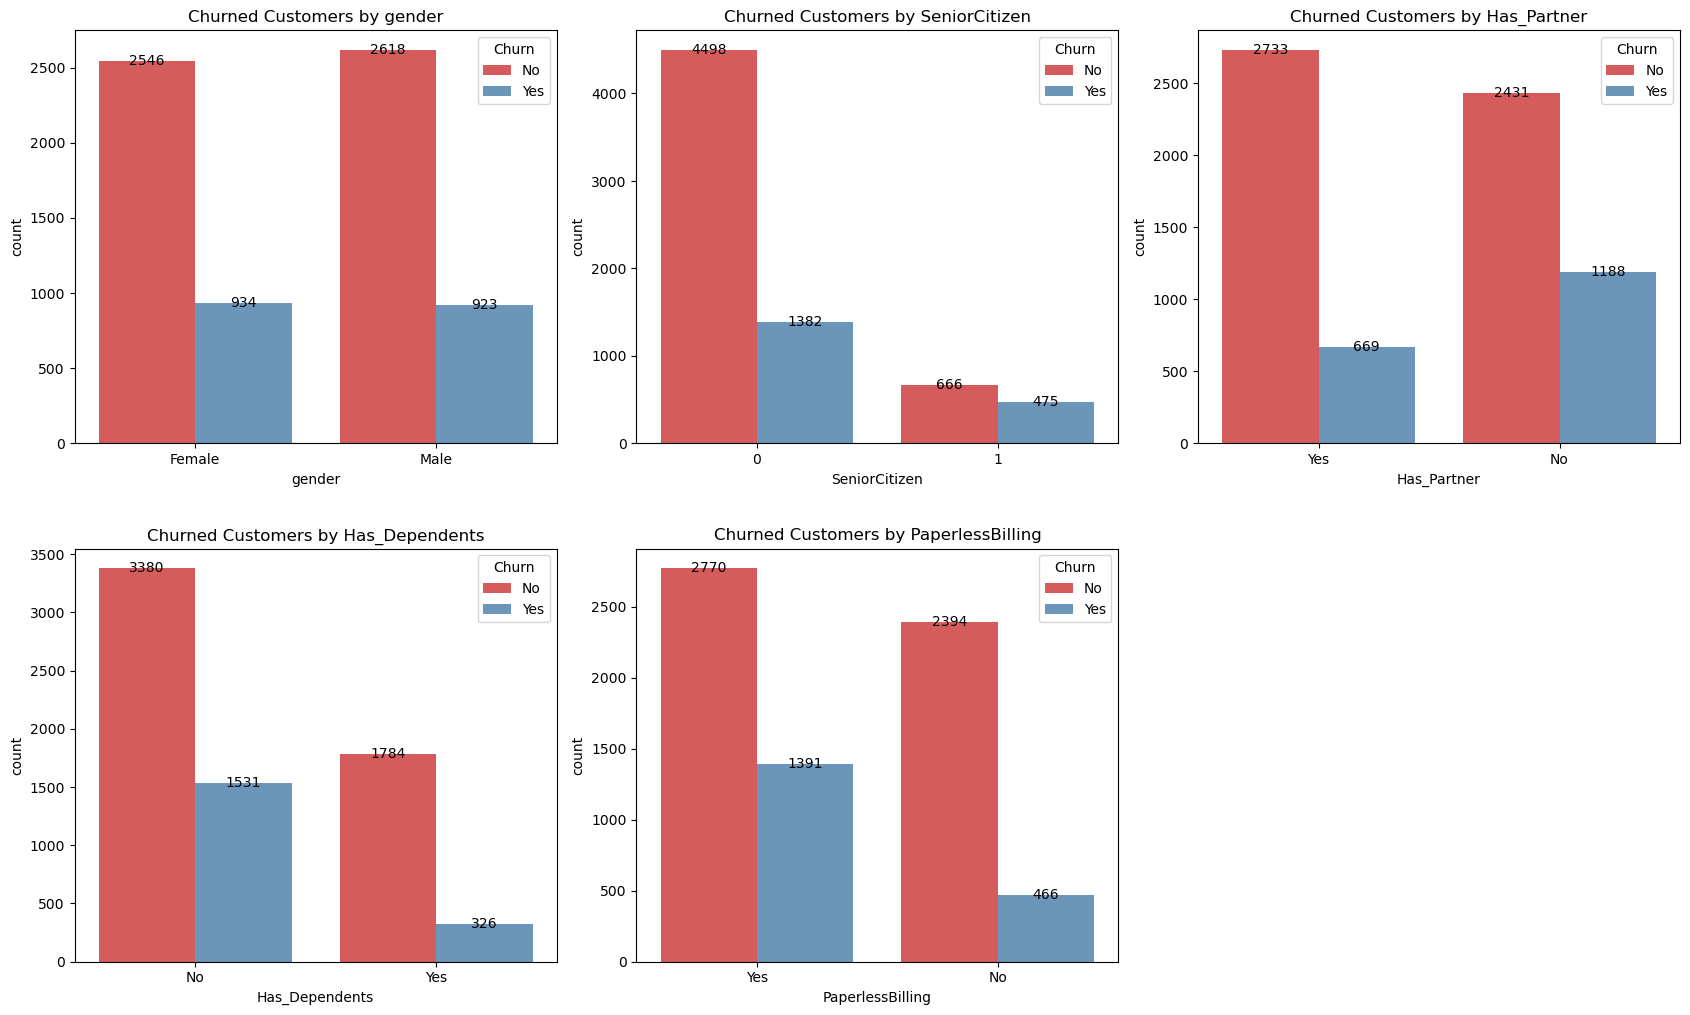

In [38]:
col_2output=['gender', 'SeniorCitizen', 'Has_Partner', 'Has_Dependents', 'PaperlessBilling']

plt.figure(figsize=(17,15))
for i,col in enumerate(col_2output,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)   

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')
    
    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3)

# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for customer churn cases :
 
- **Categorical Features (Order) :**
    - gender : Male = Female
    - SeniorCitizen : No SeniorCitizen > SeniorCitizen
    - Partner : No Partner > Partner
    - Dependents : No Dependent > Dependent
    - PhoneService : PhoneService > No PhoneService
    - MultipleLines : MultipleLines > No MultipleLines > No PhoneService
    - InternetService : Fiber Optic > DSL > No InternetService
    - OnlineSecurity : Absent > Present > No InternetService
    - OnlineBackup : Absent > Present > No InternetService
    - DeviceProtection : Absent > Present > No InternetService
    - TechSupport : Absent > Present > No InternetService
    - StreamingTV : Absent > Present > No InternetService
    - StreamingMovies : Absent > Present > No InternetService
    - Contract : Month-to-Month > One year > Two year
    - PaperlessBilling : Present > Absent
    - PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!
 
 
- **Numerical Features (Range) :**
    - tenure : 1 - 5 months
    - MonthlyCharges : 65 - 105
    - TotalCharges : 0 - 1000
    
**According to the EDA, these order / range of values results in customer churn!**

# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;">Data Preprocessing</div></center>

# Hundling Data

- Replace people that havn't internet service with No 
- Replace people that havn't Phone service with No


In [39]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

> Replace yes with 1 and No with 0 in all columns

In [40]:
def replace_yes_no(df, columns):
    
    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_to_replace = [
    "Has_Partner", "Has_Dependents", "PhoneService",'MultipleLines', "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
    "PaperlessBilling", "Churn"
]

replace_yes_no(df, columns_to_replace)

## Encoding

-OrdinalEncoder Encoding for Contract

In [41]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
categories = [['Month-to-month','One year','Two year']]
oe = OrdinalEncoder(categories = categories)
df['Contract'] = oe.fit_transform(df[['Contract']])
#pkl.dump(oe,open('Contract_oe.pkl','wb'))

df['Contract'].value_counts()

0.0    3853
2.0    1695
1.0    1473
Name: Contract, dtype: int64

-LabelEncoder for The Data that don't have to order

In [42]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])
   

## Feature Selection
- **Chi2**

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

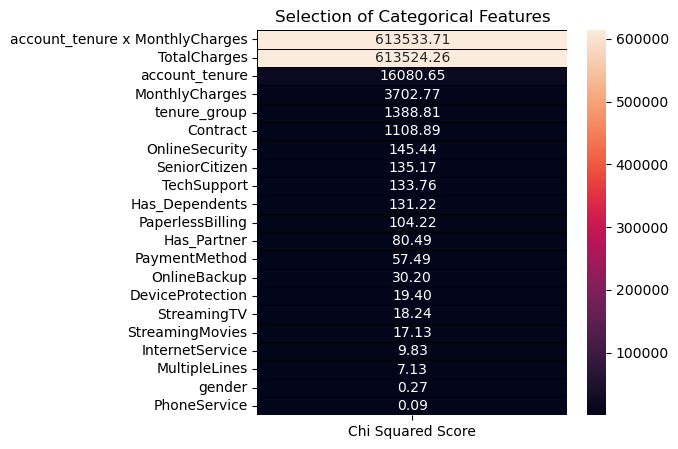

In [44]:
features = df.drop('Churn',axis=1)
target = df['Churn']

best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [45]:
df.head(3)

,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,account_tenure x MonthlyCharges,tenure_group
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0.0,1,2,29.85,29.85,0,29.85,0
1,1,0,0,0,34,1,0,0,1,0,...,0,0,1.0,0,3,56.95,1889.50,0,1936.30,2
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0.0,1,3,53.85,108.15,1,107.70,0


In [46]:
df.drop(columns = ['tenure_group','account_tenure x MonthlyCharges'],axis=1,inplace = True)
df.head()

,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1.0,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0.0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1.0,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0.0,1,2,70.70,151.65,1


## Checking the Data and Columns

In [47]:
info_columns={'Name':[], 'Data_Type':[], 'Null_Values':[], 'Num_of_unique':[], 'Unique_Values':[]}

for col in df.columns:
    info_col(df[col])
    
info_columns=pd.DataFrame(info_columns)
info_columns

,Name,Data_Type,Null_Values,Num_of_unique,Unique_Values
0,gender,int32,0,2,"[0, 1]"
1,SeniorCitizen,int64,0,2,"[0, 1]"
2,Has_Partner,int64,0,2,"[1, 0]"
3,Has_Dependents,int64,0,2,"[0, 1]"
4,account_tenure,int64,0,73,More than 10
5,PhoneService,int64,0,2,"[0, 1]"
6,MultipleLines,int64,0,2,"[0, 1]"
7,InternetService,int32,0,3,"[0, 1, 2]"
8,OnlineSecurity,int64,0,2,"[0, 1]"
9,OnlineBackup,int64,0,2,"[1, 0]"


## Checking the Balance of the Data

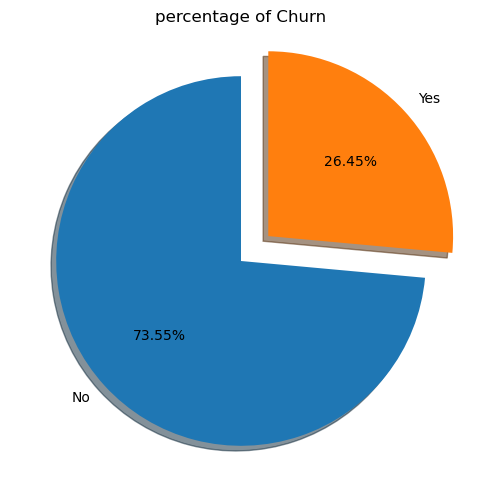

In [48]:
# Check Balanced

plt.figure(figsize=(8,6))
plt.title('percentage of Churn')
plt.pie(
    x=df['Churn'].value_counts(),
    labels=['No','Yes'],
    shadow=True,
    explode=[0.0 ,.2],
    autopct="%.2f%%",
    startangle=90
    )
plt.show()
# the majority of the Customers are not churn ,that refers to Service is Good

## Correlation of the Data

<AxesSubplot:>

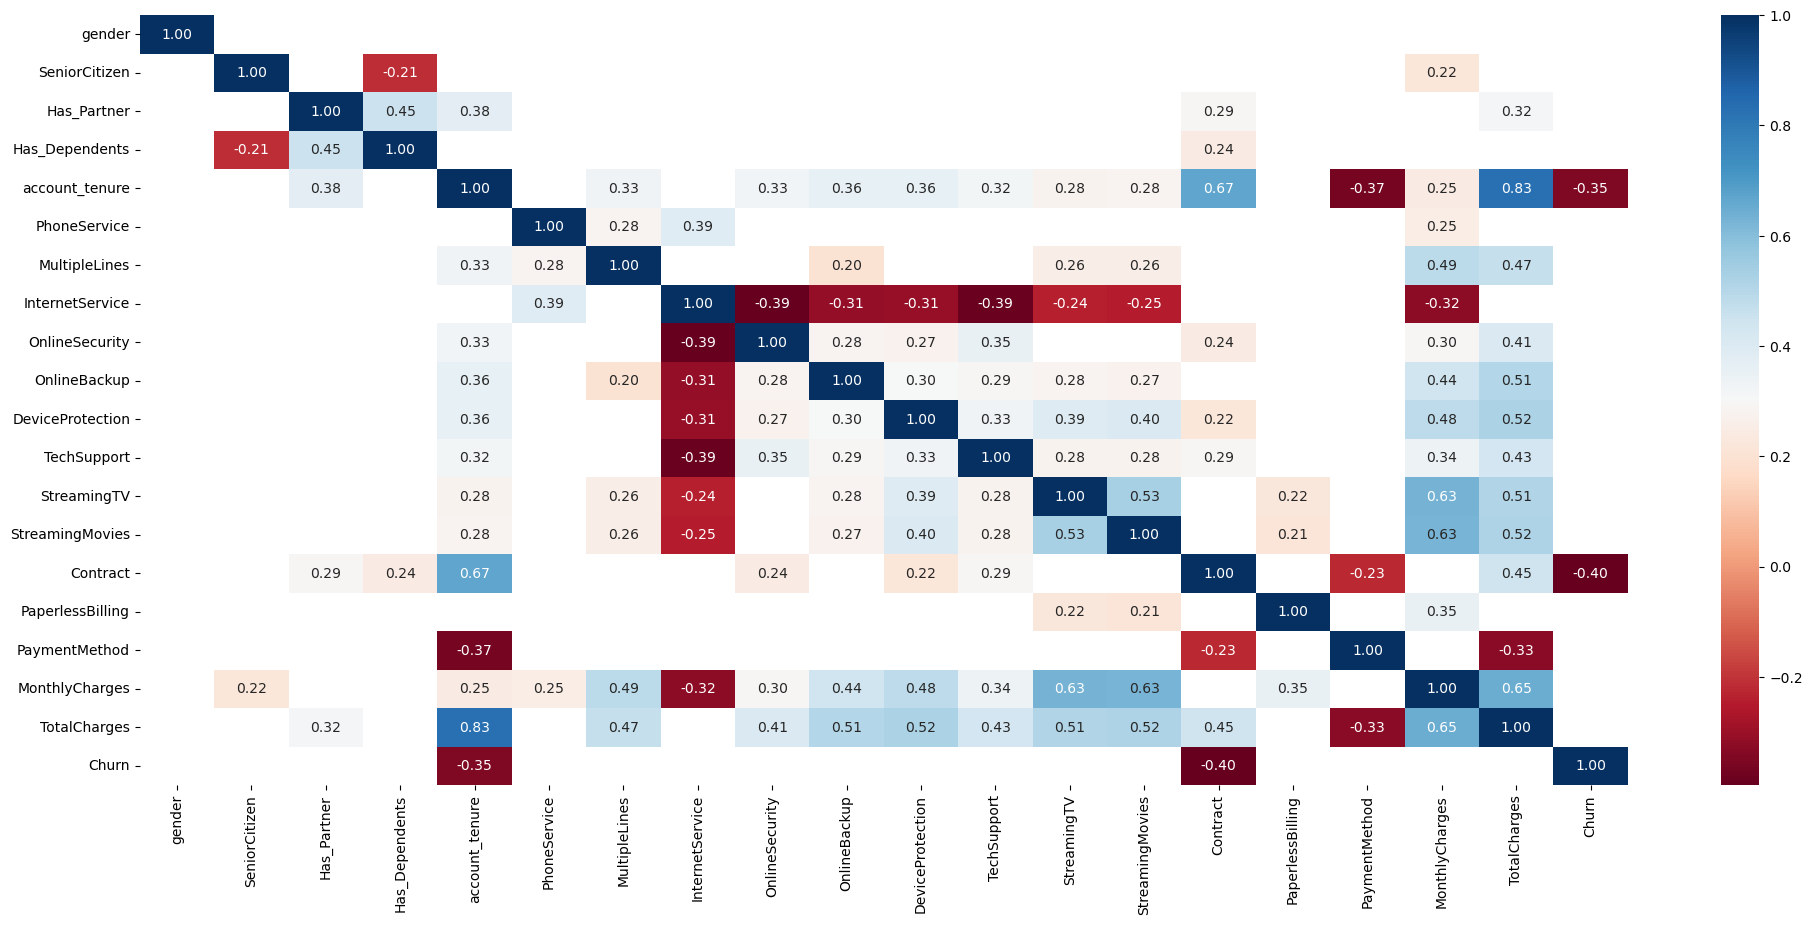

In [49]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(),fmt='.2f',annot=True,cmap = 'RdBu',mask=df.corr().abs()<0.2)

# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;">Data Modeling & Evaluate</div></center>

## Importing Libraries for applying Models on Data

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve
from collections import Counter

## Spliting Data

In [51]:
x=df.drop(['Churn','gender'], axis=1)
y=df['Churn']

## Hundeling the Unbalance Data Using SMOTE

In [52]:
!pip install imbalanced-learn


In [53]:
# hundel unbalance data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.9)
x_res, y_res = smote.fit_resample(x,y)

print(Counter(y_res))
x_res.shape,  y_res.shape

Counter({0: 5164, 1: 4647})


((9811, 18), (9811,))

## Spliting the Data for train & test and Validation

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [55]:
Accuracy_models=[]
f1_score_models=[]
precision_scores=[]
recall_scores=[]
Models_names=[]

## Function to Train, check Overfitting and Evalute of models

In [56]:
def check_overfitting(model):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)
    
    Test_accuracy = accuracy_score(y_test,y_test_pred)
    test_recall_score=recall_score(y_test,y_test_pred)
    test_f1_score =f1_score(y_test,y_test_pred)
    precision_score_test=precision_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%\n")


    print(f'-Accuracy: {Test_accuracy*100:.2f}%')
    print(f'-F1_Score: {test_f1_score*100:.2f}%')
    print(f'-Precision: {precision_score_test*100:.2f}%')
    print(f'-Recall: { test_recall_score*100:.2f}%\n\n')

    plt.figure(figsize=(15,5))
    # Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

    # ROC Curve
    plt.subplot(1, 2, 2) 
    y_test_prob = model.predict_proba(x_test)[:, 1]
    fp, tp, _ = roc_curve(y_test, y_test_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, color="r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.tight_layout(w_pad=5)
    plt.show()

    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Test accuracy: {Test_accuracy*100:.2f}%\n\n")
        
        
        
    Accuracy_models.append(Test_accuracy)
    f1_score_models.append(test_f1_score)
    precision_scores.append(precision_score_test)
    recall_scores.append(test_recall_score)

## DecissionTree model

In [57]:
decision_tree = DecisionTreeClassifier(random_state=42)
params={'criterion':['gini', 'entropy','log_loss'], 'max_depth':[5, 6, 7, 8,9, 10, 11, 12],'ccp_alpha':[0.001, 0.01, 0.02, 0.03]}

grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='accuracy')

In [58]:
finall_decision_tree=grid.best_estimator_
grid.best_params_

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9}

-Train accuracy: 82.94%
-Validation accuracy: 80.76%
-Test accuracy: 81.18%

-Accuracy: 81.18%
-F1_Score: 80.34%
-Precision: 79.49%
-Recall: 81.21%




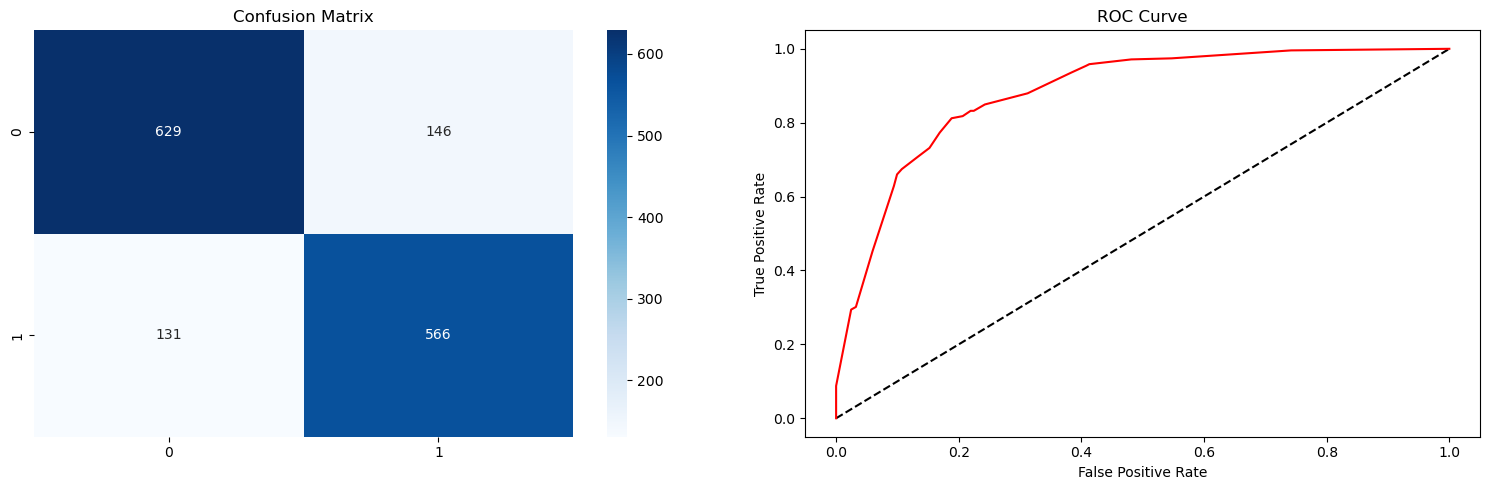

-Not Overfitting & Test accuracy: 81.18%




In [59]:
check_overfitting(finall_decision_tree)

## **Scaling Data**

In [60]:
num_col=['account_tenure','MonthlyCharges','TotalCharges']

sc=StandardScaler()
x_train[num_col]=sc.fit_transform(x_train[num_col])
x_val[num_col]=sc.transform(x_val[num_col])
x_test[num_col] =sc.transform(x_test[num_col])


## LogisticRegression Model 

In [61]:
lr= LogisticRegression()
params={'multi_class':['ovr','auto'],'C':[0.1,0.2,1,5,10],'penalty':['l1','l2']}
grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 1, 5, 10],
                         'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [62]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2'}

-Train accuracy: 81.22%
-Validation accuracy: 79.74%
-Test accuracy: 80.77%

-Accuracy: 80.77%
-F1_Score: 80.17%
-Precision: 78.36%
-Recall: 82.07%




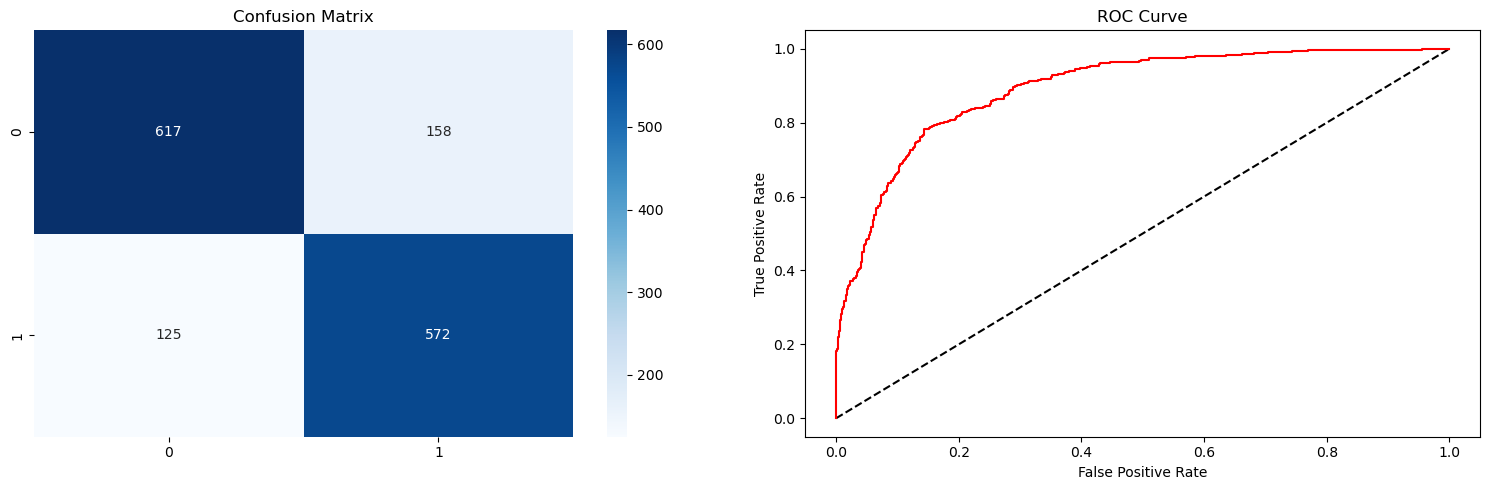

-Not Overfitting & Test accuracy: 80.77%




In [63]:
check_overfitting(finall_lr)

## Support Vector Classifier Model

In [64]:
svc=SVC(probability=True,random_state=42)
svc.fit(x_train,y_train)

SVC(probability=True, random_state=42)

-Train accuracy: 83.78%
-Validation accuracy: 81.29%
-Test accuracy: 81.73%

-Accuracy: 81.73%
-F1_Score: 80.46%
-Precision: 81.47%
-Recall: 79.48%




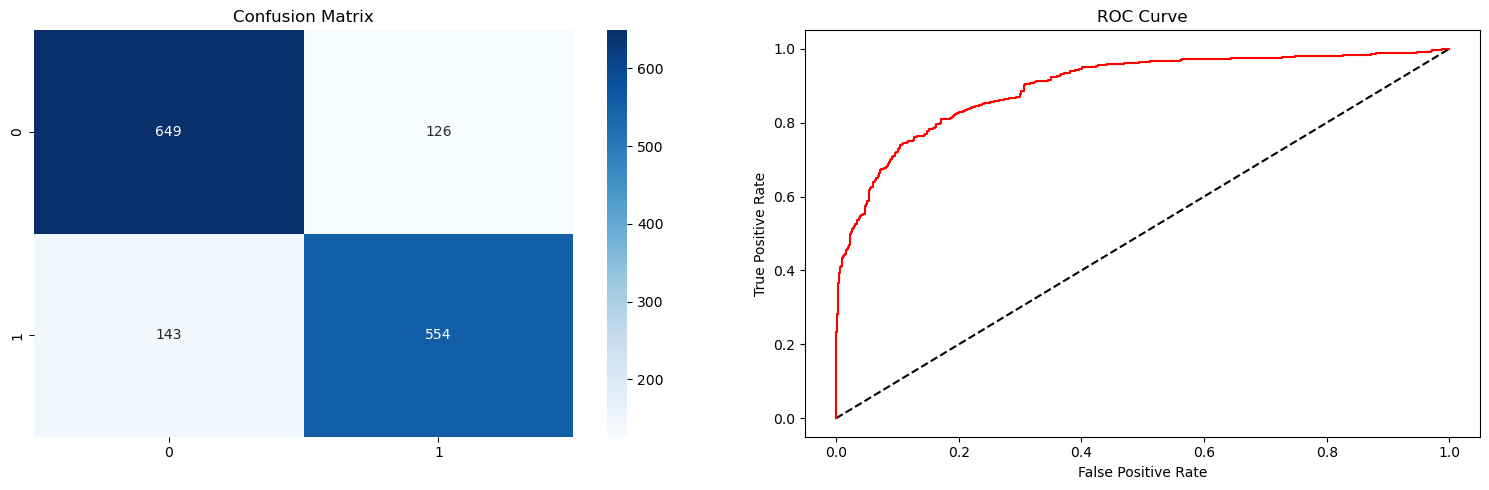

-Not Overfitting & Test accuracy: 81.73%




In [65]:
check_overfitting(svc)

## Random Forest Model

In [66]:
random_forest=RandomForestClassifier(random_state=42,ccp_alpha=0.001)
random_forest.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, random_state=42)

-Train accuracy: 83.56%
-Validation accuracy: 81.18%
-Test accuracy: 81.52%

-Accuracy: 81.52%
-F1_Score: 80.63%
-Precision: 80.06%
-Recall: 81.21%




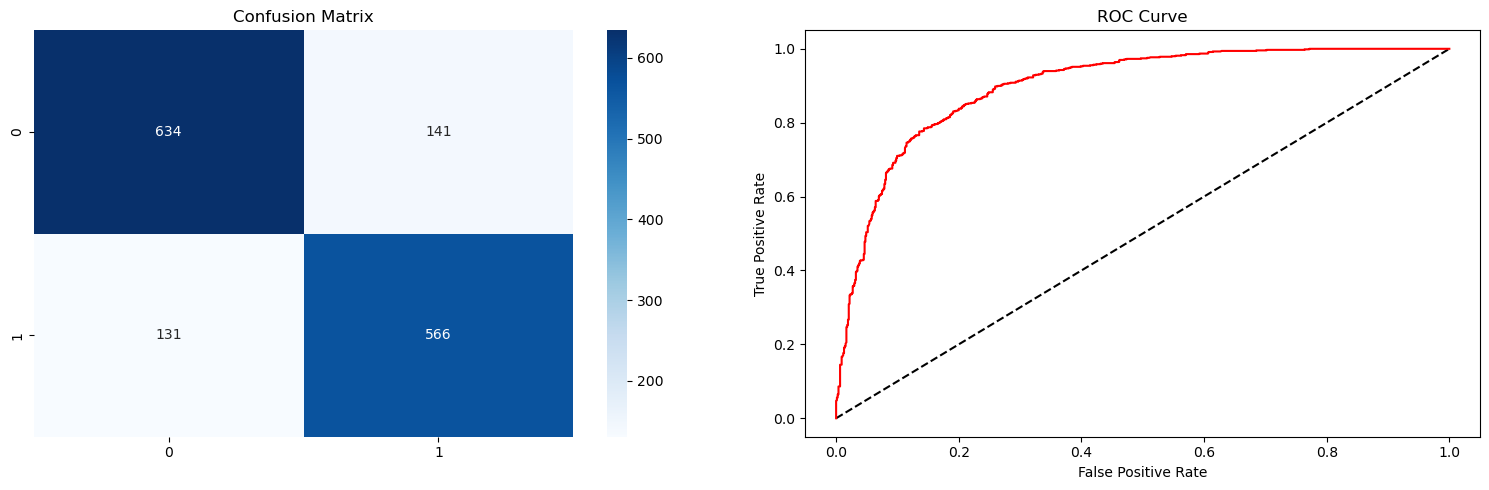

-Not Overfitting & Test accuracy: 81.52%




In [67]:
check_overfitting(random_forest)

## KNN Model

In [68]:
knn=KNeighborsClassifier(n_neighbors=12,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

-Train accuracy: 83.24%
-Validation accuracy: 78.60%
-Test accuracy: 81.18%

-Accuracy: 81.18%
-F1_Score: 81.27%
-Precision: 76.85%
-Recall: 86.23%




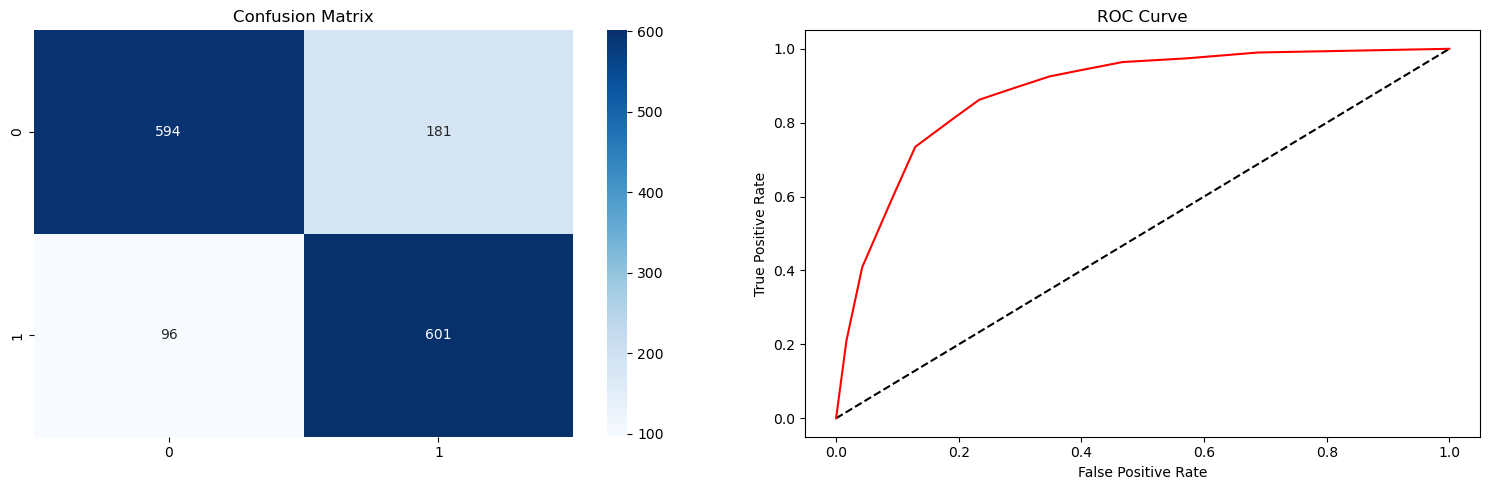

-Not Overfitting & Test accuracy: 81.18%




In [69]:
check_overfitting(knn)

## GradientBoosting Model 

In [70]:
gradient_boosting=GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=0.5,
                                            max_depth=2,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, random_state=42)

-Train accuracy: 85.86%
-Validation accuracy: 82.37%
-Test accuracy: 83.02%

-Accuracy: 83.02%
-F1_Score: 82.29%
-Precision: 81.26%
-Recall: 83.36%




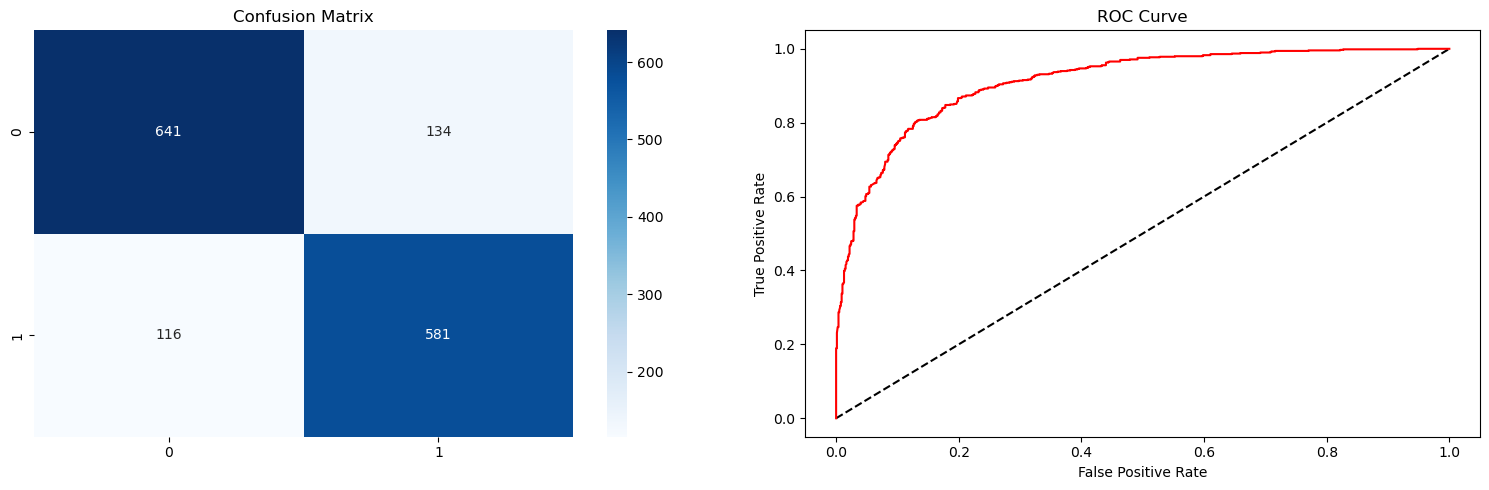

-Not Overfitting & Test accuracy: 83.02%




In [71]:
check_overfitting(gradient_boosting)

## XGBoost Model

In [72]:
xgboost=XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

-Train accuracy: 84.86%
-Validation accuracy: 81.71%
-Test accuracy: 83.49%

-Accuracy: 83.49%
-F1_Score: 83.00%
-Precision: 81.01%
-Recall: 85.08%




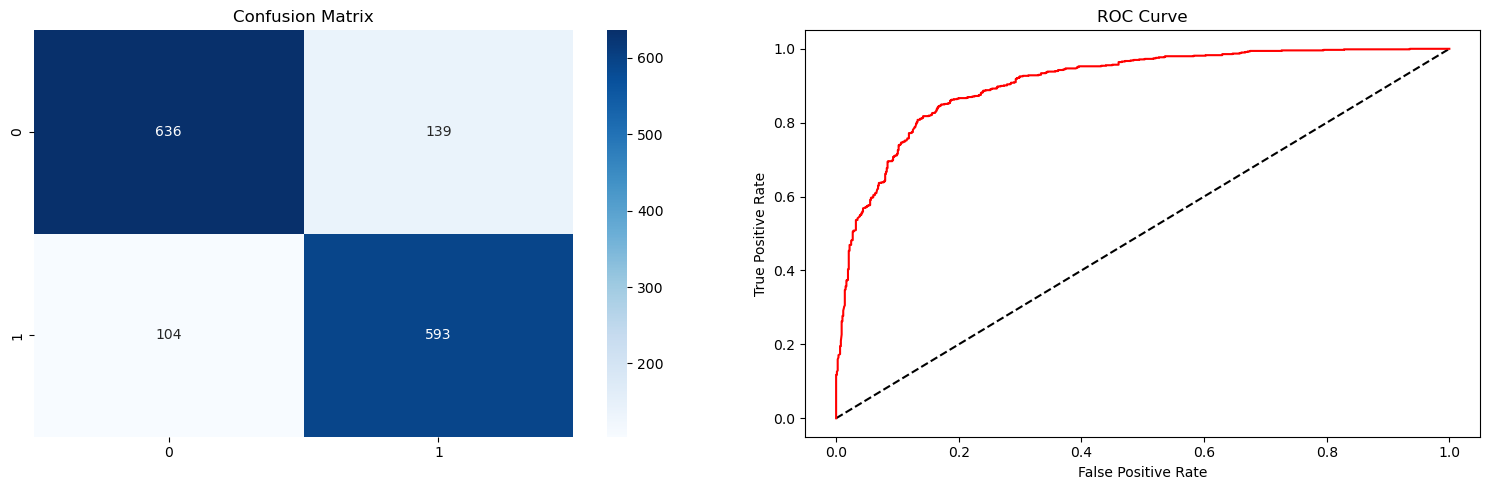

-Not Overfitting & Test accuracy: 83.49%




In [73]:
check_overfitting(xgboost)

## AdaBoost Model

In [74]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100, random_state=42)

-Train accuracy: 85.41%
-Validation accuracy: 82.49%
-Test accuracy: 83.15%

-Accuracy: 83.15%
-F1_Score: 82.68%
-Precision: 80.54%
-Recall: 84.94%




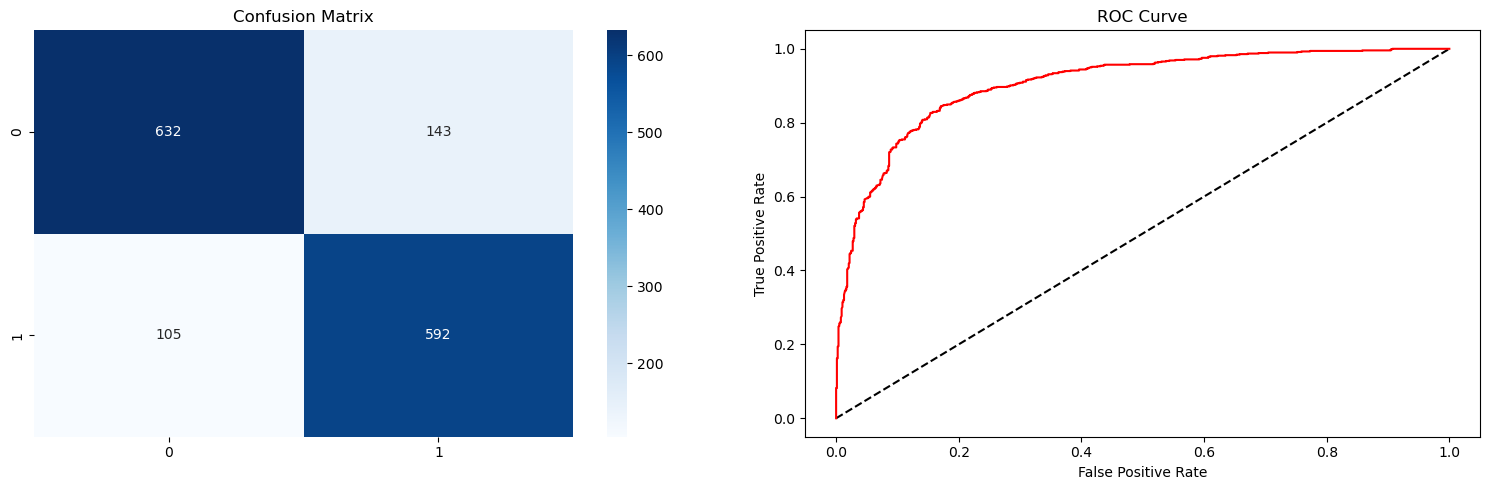

-Not Overfitting & Test accuracy: 83.15%




In [75]:
check_overfitting(adaboost)

## Stacking

In [76]:
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 100)),
               ('xgb', XGBClassifier(n_estimators=90, max_depth=4, learning_rate=0.2, random_state=42))]

meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=4)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                             

-Train accuracy: 87.86%
-Validation accuracy: 83.63%
-Test accuracy: 84.31%

-Accuracy: 84.31%
-F1_Score: 83.56%
-Precision: 82.91%
-Recall: 84.22%




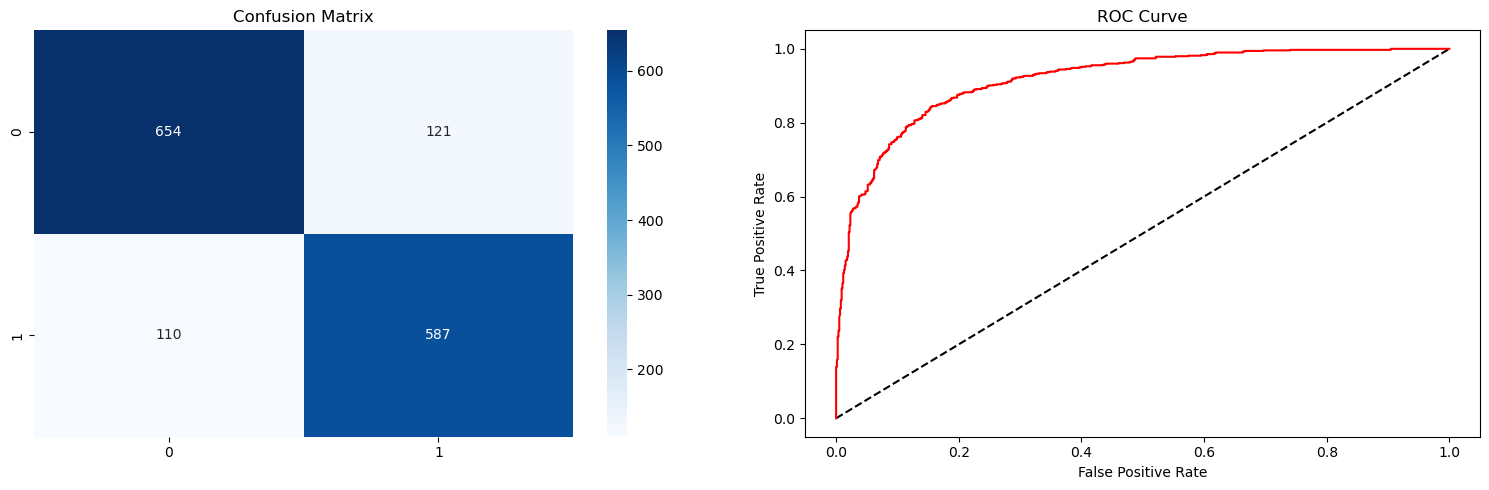

-Not Overfitting & Test accuracy: 84.31%




In [77]:
check_overfitting(stacking)

In [78]:
for name in ['Decision Tree','LogisticRegression','SVC','RandomForest','KNN','GradientBoosting','XGBoost','AdaBoost','Stacking']:
    Models_names.append(name)

# <center><div style="font-family: Trebuchet MS; background-color: #A5D6A7; color: #ffffff; padding: 12px; line-height: 1;">Accuracy Compare</div></center>



In [82]:
model_accuracy=pd.DataFrame({ 'Model':Models_names,'Accuracy':Accuracy_models,'Precision':precision_scores,'F1_Score':f1_score_models,'Recall':recall_scores }).sort_values(by='Accuracy',ascending=False)
model_accuracy.reset_index(inplace=True,drop=True)
model_accuracy

,Model,Accuracy,Precision,F1_Score,Recall
0,Stacking,0.843071,0.829096,0.835587,0.842181
1,XGBoost,0.834918,0.810109,0.829951,0.850789
2,AdaBoost,0.831522,0.805442,0.826816,0.849354
3,GradientBoosting,0.830163,0.812587,0.822946,0.833572
4,SVC,0.817255,0.814706,0.804648,0.794835
5,RandomForest,0.815217,0.800566,0.806268,0.812052
6,Decision Tree,0.811821,0.794944,0.803407,0.812052
7,KNN,0.811821,0.768542,0.812711,0.862267
8,LogisticRegression,0.807745,0.783562,0.801682,0.820660


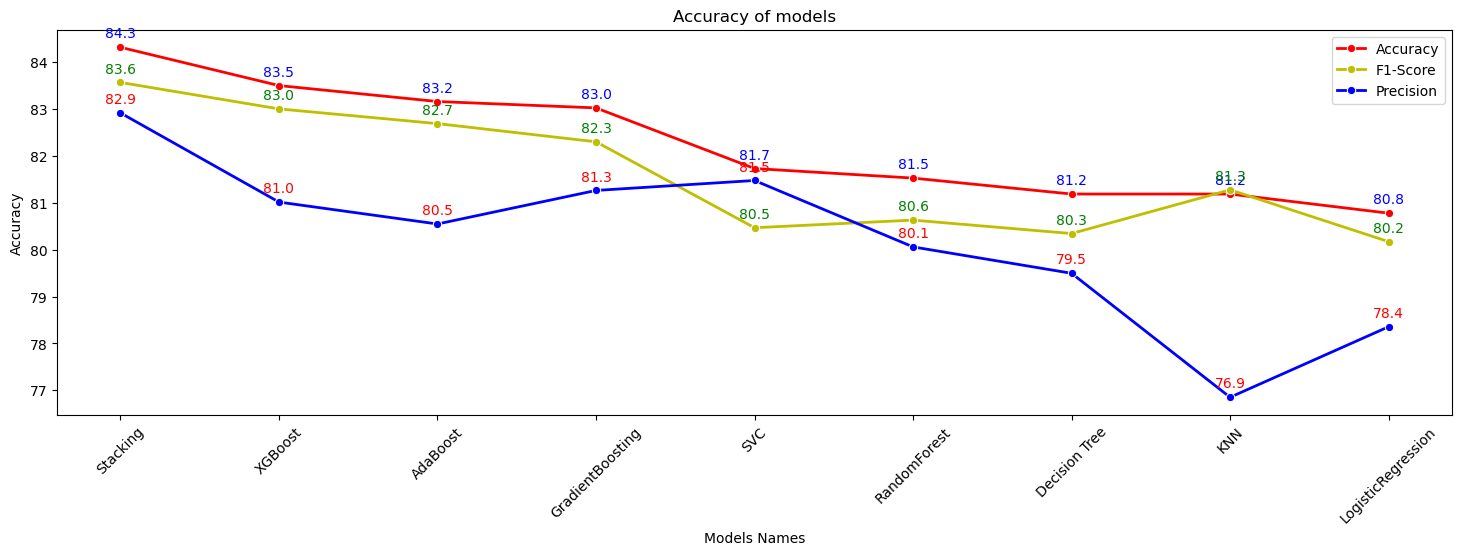

In [83]:
plt.figure(figsize=(18,5))

sns.lineplot(x=model_accuracy['Model'], y=model_accuracy['Accuracy']*100, marker='o', color='r', lw=2, label='Accuracy')
for i, score in enumerate(model_accuracy['Accuracy']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='b')
    
sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='y',lw=2,label='F1-Score')
for i, score in enumerate(model_accuracy['F1_Score']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='g')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Precision']*100,marker='o',color='b',lw=2,label='Precision')
for i, score in enumerate(model_accuracy['Precision']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='r')
    
plt.legend()
plt.xticks(rotation=45)

plt.xlabel('Models Names')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.show()

In [84]:
best_accuracy= model_accuracy.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
best_precision=model_accuracy.sort_values(by='Precision',ascending=False).reset_index(drop=True)
best_f1_score=model_accuracy.sort_values(by='F1_Score',ascending=False).reset_index(drop=True)
best_recall=model_accuracy.sort_values(by='Recall',ascending=False).reset_index(drop=True)
     

print(f'Best Accuracy Model: {best_accuracy.Model[0]} With accuracy: {best_accuracy.Accuracy[0]*100:0.2f}%')
print(f'Best F1_Score Model: {best_f1_score.Model[0]} With F1_Score: {best_f1_score.F1_Score[0]*100:0.2f}%')
print(f'Best Precision Model: {best_precision.Model[0]} With Precision: {best_precision.Precision[0]*100:0.2f}%')
print(f'Best Recall Model: {best_precision.Model[0]} With Recall: {best_recall.Recall[0]*100:0.2f}%')

Best Accuracy Model: Stacking With accuracy: 84.31%
Best F1_Score Model: Stacking With F1_Score: 83.56%
Best Precision Model: Stacking With Precision: 82.91%
Best Recall Model: Stacking With Recall: 86.23%



- ### Stacking is the best model